# Spotify Listening History EDA & Cleaning
---
This notebook will:
- Load multiple years of Spotify streaming history
- Combine datasets into a single DataFrame
- Convert timestamps to datetime objects
- Check for overlapping time periods
- Perform initial exploratory data analysis (EDA)
- Clean Data (missing values, duplicates, outliers)
- Perform Subsequent exploratory data analysis (EDA)
- Prepare the dataset for deeper analysis and visualization

## 1. Load Data
---

In [1]:
#Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the cleaned CSVs from the previous notebook
df_2022_2023 = pd.read_csv("Spotify_2022_2023.csv")
df_2023_2025 = pd.read_csv("Spotify_2023_2025.csv")

#Quick peek at both
display(df_2022_2023.head())
display(df_2023_2025.head())

,endTime,msPlayed,trackName,artistName,albumName
0,2022-07-08T14:28:19Z,0,Rhyme Or Reason,Eminem,The Marshall Mathers LP2
1,2022-07-08T14:28:20Z,661,My Fault,Eminem,The Slim Shady LP
2,2022-07-08T14:28:21Z,725,Just the Way You Are,Bruno Mars,Doo-Wops & Hooligans
3,2022-07-08T14:28:21Z,661,Marsh,Eminem,Music To Be Murdered By - Side B
4,2022-07-08T14:28:22Z,682,"Can You Feel the Love Tonight - From ""The Lion...",Joseph Williams,Disney Summer Songs


,endTime,msPlayed,trackName,artistName,albumName
0,2023-05-03T22:30:21Z,768,Grenade,Bruno Mars,Doo-Wops & Hooligans
1,2023-05-03T22:30:25Z,4160,The Lazy Song,Bruno Mars,Doo-Wops & Hooligans
2,2023-05-05T19:54:16Z,89493,Nikki Sixx,Doobie,Nikki Sixx
3,2023-05-05T20:02:18Z,14826,Icy Titties,Doobie,Icy Titties
4,2023-05-05T20:02:19Z,320,When the Drugs Don't Work,Doobie,When the Drugs Don't Work


### **Quick Note | Convert to Datetime & Check Ranges**

Before combining datasets, I need to ensure that the timestamps are in a proper datetime format.  
This will ensure I can later:  
- Accurately compare time ranges of each dataset  
- Check for any overlaps in 2023  
- Prepare the data for time-based analysis

In [4]:
#Convert the timestamp column to datetime
df_2022_2023["endTime"] = pd.to_datetime(df_2022_2023["endTime"])
df_2023_2025["endTime"] = pd.to_datetime(df_2023_2025["endTime"])

In [5]:
#Check the min and max timestamps
print("2022-2023 dataset range:")
print(df_2022_2023["endTime"].min(), "to", df_2022_2023["endTime"].max())

print("\n2023-2025 dataset range:")
print(df_2023_2025["endTime"].min(), "to", df_2023_2025["endTime"].max())

2022-2023 dataset range:
2022-07-08 14:28:19+00:00 to 2023-05-03 22:30:20+00:00

2023-2025 dataset range:
2023-05-03 22:30:21+00:00 to 2025-08-04 19:59:02+00:00


## 2. Combining Spotify Streaming History Datasets
---

Before combining my datasets and performing any exploratory data analysis (EDA), I needed to ensure that my datasets do not have overlapping timestamps.  

So, I confirmed the date ranges for the datasets:
- **2022-2023 dataset:** 2022-07-08 14:28:19 → 2023-05-03 22:30:20  
- **2023-2025 dataset:** 2023-05-03 22:30:21 → 2025-08-04 19:59:02  

Since there is no overlap between these two datasets, I can safely concatenate them into a single combined dataset. This combined dataset will serve as the foundation for my EDA and cleaning, to ensure the consistency across my full listening history from 2022-2025.


In [6]:
#Concatenate the two datasets into a single df
df_combined = pd.concat([df_2022_2023, df_2023_2025], ignore_index=True)

#Quick check
print(f"Combined dataset shape: {df_combined.shape}")
print(f"Date range: {df_combined['endTime'].min()} → {df_combined['endTime'].max()}")

Combined dataset shape: (32202, 5)
Date range: 2022-07-08 14:28:19+00:00 → 2025-08-04 19:59:02+00:00


### **Next Steps | Exploratory Data Analysis (EDA)**

With the combined dataset in place, I will explore the data to understand listening patterns and identify any inconsistencies or missing values.

**Key items to examine:**
- Data Quality Checks: Missing values, duplicates, and/or other inconsistencies
- Listening Duration
- Track, Artist, and Album Insights
- Playback Behavior

## 3a. Initial Exploratory Data Analysis (EDA)
---

In [7]:
#Quick overview
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32202 entries, 0 to 32201
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   endTime     32202 non-null  datetime64[ns, UTC]
 1   msPlayed    32202 non-null  int64              
 2   trackName   32189 non-null  object             
 3   artistName  32189 non-null  object             
 4   albumName   32189 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 1.2+ MB


In [9]:
#Check for missing values
df_combined.isnull().sum()

endTime        0
msPlayed       0
trackName     13
artistName    13
albumName     13
dtype: int64

In [13]:
#Check for duplicates
df_combined.duplicated().sum()

np.int64(9)

In [11]:
#Peek at unique artists and tracks
print(f"Number of unique artists: {df_combined['artistName'].nunique()}")
print(f"Number of unique tracks: {df_combined['trackName'].nunique()}")

Number of unique artists: 1366
Number of unique tracks: 3342


In [12]:
#Summary stats for `msPlayed`
df_combined['msPlayed'].describe()

count    3.220200e+04
mean     5.442085e+04
std      8.652293e+04
min      0.000000e+00
25%      2.026000e+03
50%      8.083500e+03
75%      6.891325e+04
max      1.471253e+06
Name: msPlayed, dtype: float64

### **Initial EDA Findings | Data Quality Checks**
- Rows/Columns: 32,202 entries, 5 columns
- Data Types:
    - `endTime`: datetime (already converted)
    - `msPlayed`: integer (**milliseconds**, will convert during cleaning)
    - `trackName`, `artistName`, and `albumName`: objects (**13 missing values** each)
- Missing Values: 13 rows missing track, artist, and album values
- Duplicates: **9 exact duplicate rows**
- Unique Tracks/Artists: **1,366 unique artists & 3,342 unique tracks** (has variety)
- msPlayed Summary:
    - Mean: 54,420 ms (~54 seconds)
    - Min: 0 ms (likely track started but never played)
    - Max: 1,471,253 ms (~24 minutes)

## 4. Cleaning
---
The **main goals** of this cleaning step are:
- Handle missing values: 13 rows (drop)
- Remove Duplicates: 9 rows
- Filter out zero-play tracks: `msPlayed = 0`
- Standardize time and numerical features: `msPlayed`: Milliseconds to seconds

In [16]:
#Drop rows with missing track, artist, or album names
df_cleaned = df_combined.dropna(subset=['trackName', 'artistName', 'albumName'])

In [17]:
#Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

In [18]:
#Filter out zero-play tracks (msPlayed = 0)
df_cleaned = df_cleaned[df_cleaned['msPlayed'] > 0]

In [19]:
#Reset index after cleaning (keep things organized)
df_cleaned.reset_index(drop=True, inplace=True)

In [20]:
#Quick verification check
print("Cleaned dataset shape:", df_cleaned.shape)
print("Number of missing values per column:\n", df_cleaned.isna().sum())
print("Number of duplicate rows remaining:", df_cleaned.duplicated().sum())

Cleaned dataset shape: (31155, 5)
Number of missing values per column:
 endTime       0
msPlayed      0
trackName     0
artistName    0
albumName     0
dtype: int64
Number of duplicate rows remaining: 0


In [21]:
#Convert milliseconds to seconds
df_cleaned["secondsPlayed"] = df_cleaned["msPlayed"] / 1000

#Also keep minutes (potential for later analysis)
df_cleaned["minutesPlayed"] = df_cleaned["msPlayed"] / 60000

#Peek at the new columns
df_cleaned[["msPlayed", "secondsPlayed", "minutesPlayed"]].head()

,msPlayed,secondsPlayed,minutesPlayed
0,661,0.661,0.011017
1,725,0.725,0.012083
2,661,0.661,0.011017
3,682,0.682,0.011367
4,703,0.703,0.011717


### **Data Cleaning | Summary**
In this step, the dataset was cleaned to ensure accurate analysis. 
I conducted the following actions:
- Dropped 13 rows with missing track, artist, and/or album information
- Removed 9 duplicate rows
- Filtered out tracks that were played for 0 milliseconds
- Reset the index to ensure a sequential order
- Converted `msPlayed` (milliseconds) into `secondsPlayed` & `minutesPlayed`

This cleaned dataset now has 31,155 rows and will be used for my subsequent EDA for further patterns and trends.

## 3b. Subsequent Exploratory Data Analysis (EDA) 
---

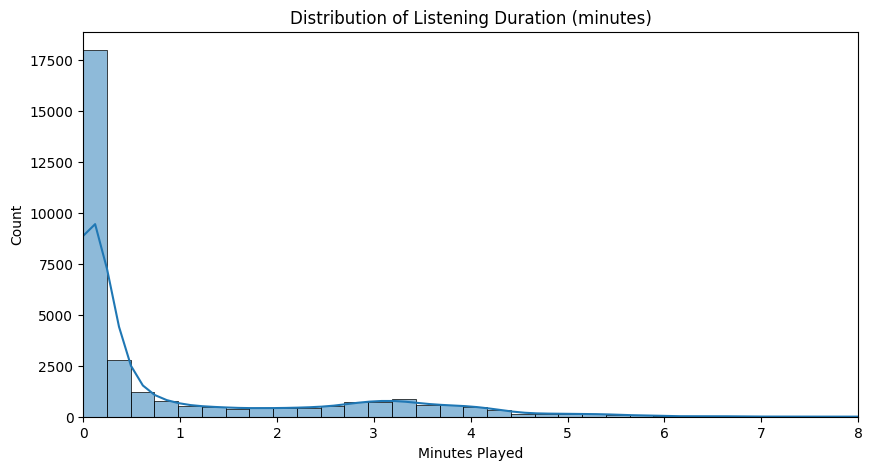

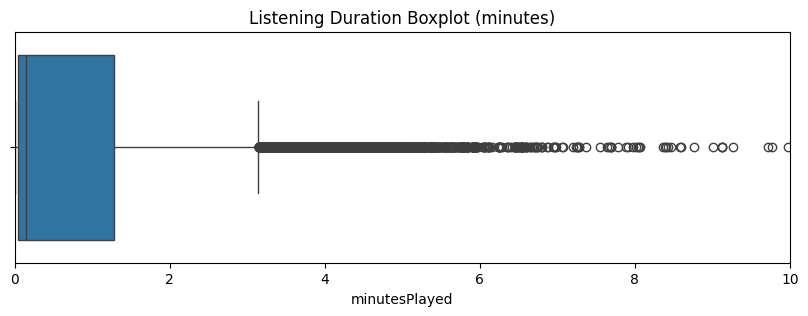

In [25]:
#Add
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram (listening duration in minutes)
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['minutesPlayed'], bins=100, kde=True)
plt.title('Distribution of Listening Duration (minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Count')
plt.xlim(0, 8)
plt.show()

#Boxplot (check for extreme outliers)
plt.figure(figsize=(10,3))
sns.boxplot(x=df_cleaned['minutesPlayed'])
plt.title('Listening Duration Boxplot (minutes)')
plt.xlim(0, 10)
plt.show()

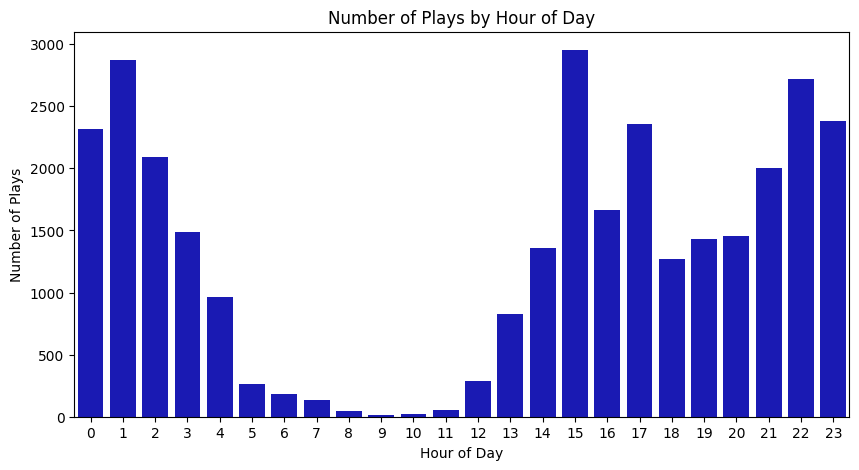

In [28]:
#Extract hour from endTime
df_cleaned['hour'] = df_cleaned['endTime'].dt.hour

#Time-based Distribution (plays by hour)
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df_cleaned, color='mediumblue')
plt.title('Number of Plays by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Plays')
plt.show()

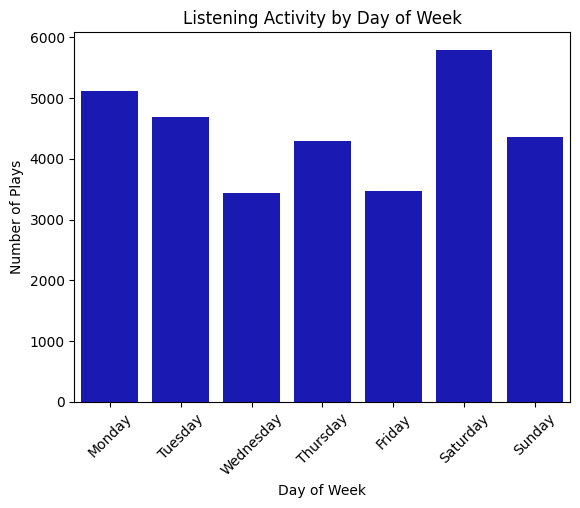

In [45]:
#Create day of week column
df_cleaned['dayOfWeek'] = df_cleaned['endTime'].dt.day_name()

#Order days properly (Monday-Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
             'Friday', 'Saturday', 'Sunday']

plt.figure()
sns.countplot(
    x='dayOfWeek',
    data=df_cleaned,
    order=day_order,
    color='mediumblue'
)
plt.title('Listening Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45)
plt.show()

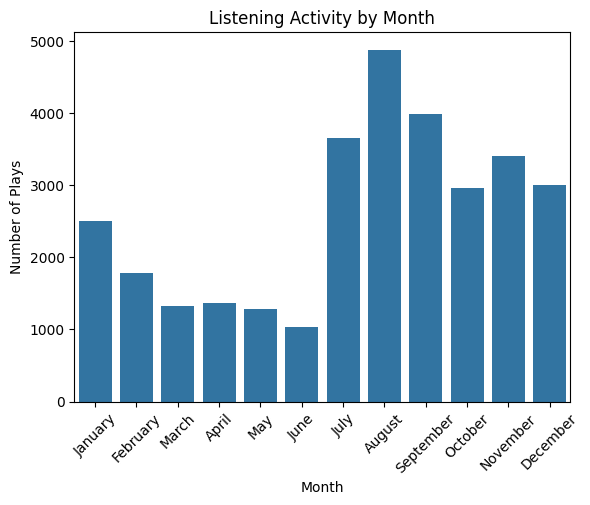

In [44]:
#Create month column
df_cleaned['month'] = df_cleaned['endTime'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

#Plays by month
plt.figure()
sns.countplot(
    x='month',
    data=df_cleaned,
    order=month_order
)
plt.title('Listening Activity by Month')
plt.xlabel('Month')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45)
plt.show()

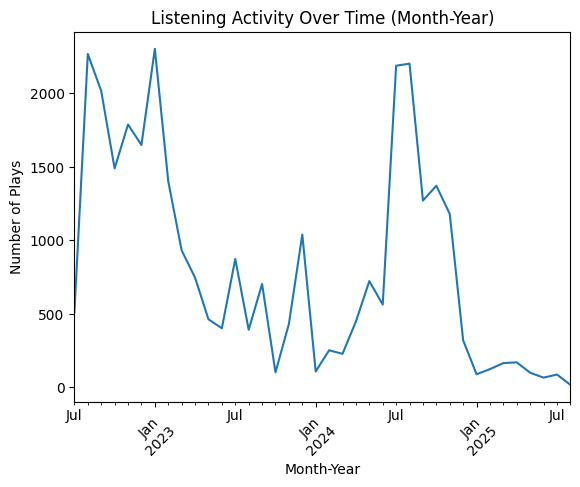

In [47]:
#Create year-month column
df_cleaned['yearMonth'] = df_cleaned['endTime'].dt.tz_convert(None).dt.to_period('M')

plays_by_month = df_cleaned.groupby('yearMonth').size()

#Plays over time (month & year trend)
plt.figure()
plays_by_month.plot()
plt.title('Listening Activity Over Time (Month-Year)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45)
plt.show()

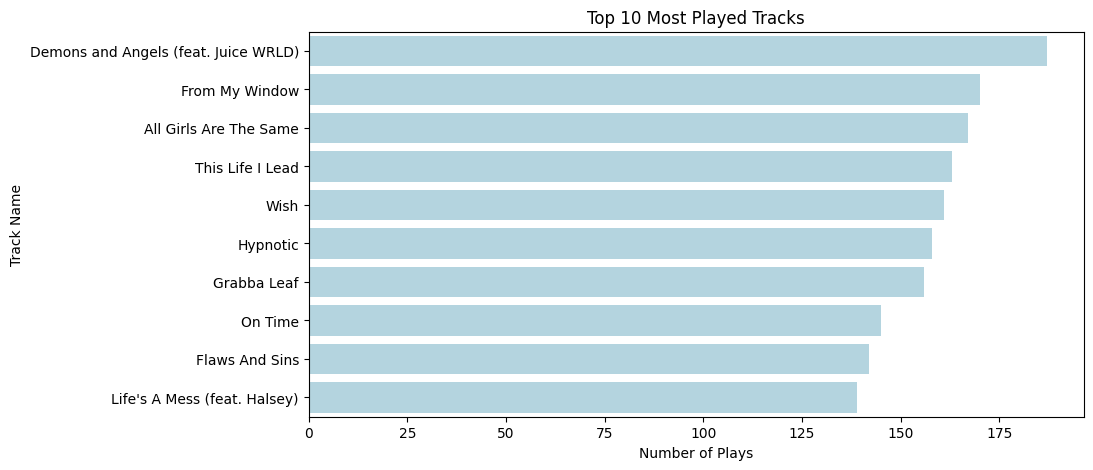

In [33]:
#Top Tracks Plot
top_tracks = df_cleaned['trackName'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_tracks.values, y=top_tracks.index, color='lightblue')
plt.title('Top 10 Most Played Tracks')
plt.xlabel('Number of Plays')
plt.ylabel('Track Name')
plt.show()

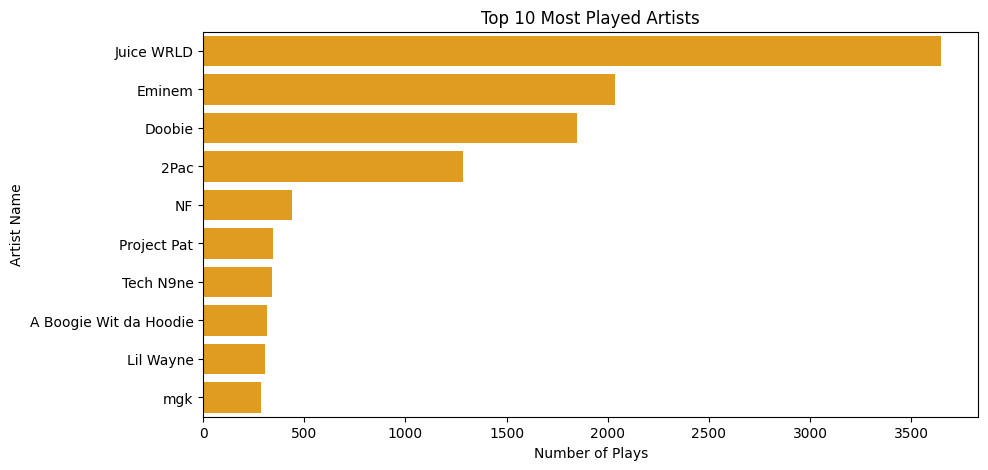

In [41]:
#Top Artist Plot
top_artists = df_cleaned['artistName'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, color='orange')
plt.title('Top 10 Most Played Artists')
plt.xlabel('Number of Plays')
plt.ylabel('Artist Name')
plt.show()

### **Subsequent EDA Insights | Visuals**
After addressing the initial data quality issues and completing the cleaning process, further exploratory data analysis was conducted to better understand listening behavior and identify meaningful patterns in my dataset.

- **Listening Duration Patterns:**
 Analysis of listening duration shows a highly right-skewed distribution. Most listening events are short in duration, which likely reflects:
    - Skipped tracks, partial listens, & short playbacks (quickly changing songs)
 A smaller number of tracks exhibit significantly longer listening times, which constitute full song plays or extensive listening sessions. The longer duration plays contribute to the presence of outliers in the distribution.
---

- **Time-Based Listening Trends:**
 My time-based exploration reveals clear temporal patterns:
     - **Hourly Trends** show noticeable peaks at 1 am and 3 pm, and common leisure periods around 8 am to 11 am.
     - **Day-of-week Trends** indicate that listening behavior differs across weekdays and weekends, with Saturday exhibiting the highest peak in listening activity, followed by Monday as the most active weekday, while Wednesday and Friday exhibit the lowest levels of engagement.
     - **Monthly and yearly trends** reveal clear variation across the year. Listening peaks in August of 2022, January 2023, and August of 2024. Absences were apparent in October of 2023, January of 2024, and January of 2025.
---

- **Top Tracks and Artists:**
     - **Tracks:** Top 3 most-played tracks show clear replay behavior
     - **Artists:** Top 3 artists account for a significant portion of total listening activity
